In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path: sys.path.append(nb_dir)
from src import wdata
import seaborn as sns;
from skimage.transform import rescale, resize, downscale_local_mean

'''
Sat Start: July 2(182) - September 31()
184-195 --> since there is no 182 --> (July 4th - July 15th)
 
#Radar Start: radar.20170702.00.dat


Files I am going to use:
July 4th 17-18th hour (15 minute on of every hour for satellite)
'''

'\nSat Start: July 2(182) - September 31()\n184-195 --> since there is no 182 --> (July 4th - July 15th)\n \n#Radar Start: radar.20170702.00.dat\n\n\nFiles I am going to use:\nJuly 4th 17-18th hour (15 minute on of every hour for satellite)\n'

In [2]:
imgs2017 = wdata.Radar.getYear(2017)

(126, 201)


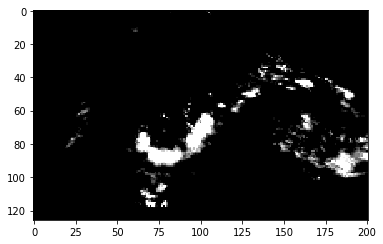

In [54]:
print(imgs2017[0][1].shape)
image = imgs2017[0][1]
plt.imshow(image, cmap='gray')

<class 'numpy.ndarray'>


/home/yuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


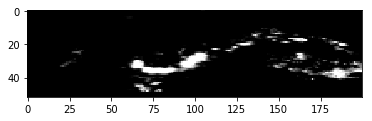

In [55]:
def resize_radar(radar_list): #radar will be the list of radar images, and shape will be the shape you want to resize it to
    resized_list = []
    for index in range(len(radar_list)):
        #print(radar_list[index][0])
        resized_radar = resize(radar_list[index][1], (52, 200))
        #print("size of resized:", resized_radar.shape)
        resized_list.append(resized_radar)
    return resized_list
    
test = resize_radar(imgs2017)
print(type(test[0])) # now it seems like it returns a list of numpy arrays
plt.imshow(test[0], cmap='gray')


In [24]:
nparray = np.fromfile("/home/yuan/Documents/Spring-2018/Senior Design/Weather/new-radar-data/radar.20170311.18.dat",dtype='int16',count=-1,sep='')
image = np.reshape(nparray, (126,201))
image_resized = resize(image, (52, 200))
print(type(image_resized))
print(image_resized)

<class 'numpy.ndarray'>
[[1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 ...
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]]


/home/yuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
def data_read_display(data):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt

    dims = (126,201)   # rows, columns
    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall
    
    data = np.reshape(data,dims)

    
    #print('elemnt of max', np.argmax(data))
    print('np.max(data)', np.max(data))
    print('np.min(data)', np.min(data))
    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
            data = (data - minmax[0])/(minmax[1] - minmax[0])
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.imshow(data, cmap='gray', origin='lower')  

np.max(data) 1.0
np.min(data) 0.0


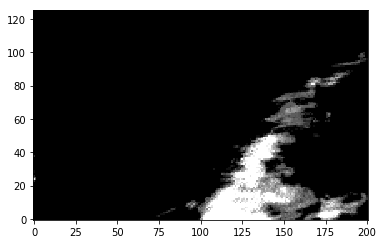

In [8]:
plot = data_read_display(test)

In [9]:
def gettran_radar(n_of_files, radar_list):
    short_list = radar_list[:10]
    

In [11]:
wdata.Sat.getYear(2017, 4)

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/home/yuan/.local/lib/python3.6/site-packages/IPython/core/history.py", line 834, in run
  File "<decorator-gen-23>", line 2, in writeout_cache
  File "/home/yuan/.local/lib/python3.6/site-packages/IPython/core/history.py", line 58, in needs_sqlite
  File "/home/yuan/.local/lib/python3.6/site-packages/IPython/core/history.py", line 780, in writeout_cache
  File "/home/yuan/.local/lib/python3.6/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
sqlite3.OperationalError: unable to open database file

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/yuan/.local/lib/python3.6/site-packages/ipykernel/iostream.py", line 97, in _event_pipe
AttributeError: '_thread._local' object has no attribute 'event_pipe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):


OSError: [Errno 24] Too many open files: b'/home/yuan/Documents/Spring-2018/Senior Design/Weather/Satellite-data/goes13.2017.182.001519.BAND_04.nc'